# Explanations for neural network predictions
I examined a number of methods for obtaining explanations for a neural net's predictions:
- [LIME](https://arxiv.org/abs/1602.04938)
- [DeepLIFT](https://arxiv.org/abs/1704.02685)
- [SHAP](https://arxiv.org/abs/1705.07874)
- [Integrated Gradients](https://arxiv.org/abs/1703.01365)

I ended up implementing the integrated gradients method because:
- It's fast on neural nets (unlike the neighborhood-based methods).
- The only computation required is evaluation of the gradient of the loss function with respect to the input pixels.

Integrated gradients computes each input pixel's contribution to the class prediction. The contributions of the pixels sum to the difference between the prediction on the test image, and the prediction on an all-black "baseline" image. Pixels can have positive or negative contributions. In some cases the difference between the positive and negative contributions is intuitive; in other cases it's not at all.

## Implementation
Integrated gradients is implemented in this small GitHub repo: https://github.com/AllenCellModeling/integrated_gradients. It can be used to give explanations for PyTorch classifier the group trains.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.append("../pytorch_learning_tools/")
import explain

## Explanation for 3-d structure prediction
Load in Greg's trained model and load up data provider.

In [4]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [5]:
dp = explain.get_dp()
model = explain.get_model()
gpu_id = model.gpu_ids[0]

Loading from ../output/classifier3D/


## Explanation for 3-d structure prediction
Load in Greg's trained model and load up data provider.

### Explaining the correct class label
Choose one example of each structure label and compute an explanation. 
- The method is able to identify that the structure channel is most informative, and focuses on the relevant pixels. 
- In general, many more pixels receive positive attributions than negative. 
- There are a few exceptions. See Desmoplakin. This could be because there are very few pixels from which to make a decision.

100%|██████████| 100/100 [00:27<00:00,  3.34it/s]


<IPython.core.display.Javascript object>


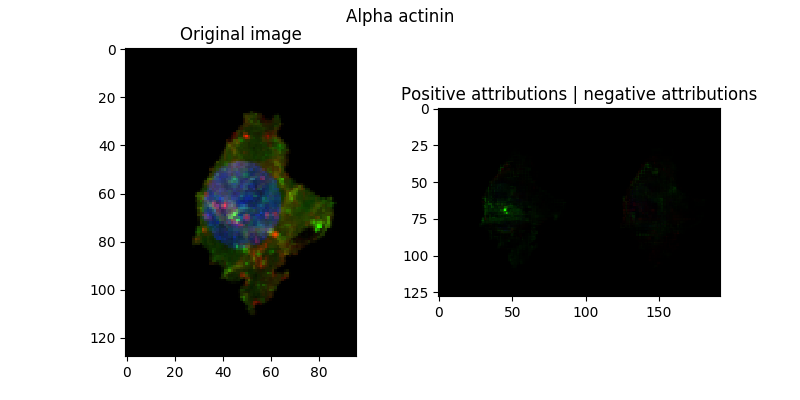

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: 1.00. Sum of attributions: 1.00


100%|██████████| 100/100 [00:29<00:00,  3.23it/s]


<IPython.core.display.Javascript object>


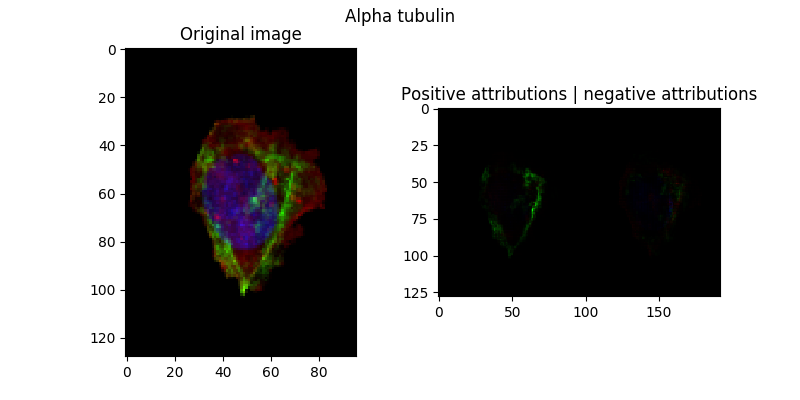

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: 1.00. Sum of attributions: 1.00


100%|██████████| 100/100 [00:29<00:00,  3.17it/s]


<IPython.core.display.Javascript object>


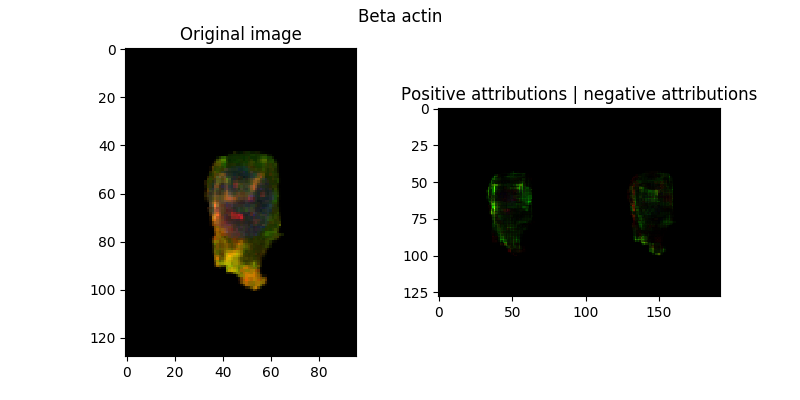

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: 1.00. Sum of attributions: 1.00


100%|██████████| 100/100 [00:30<00:00,  3.26it/s]


<IPython.core.display.Javascript object>


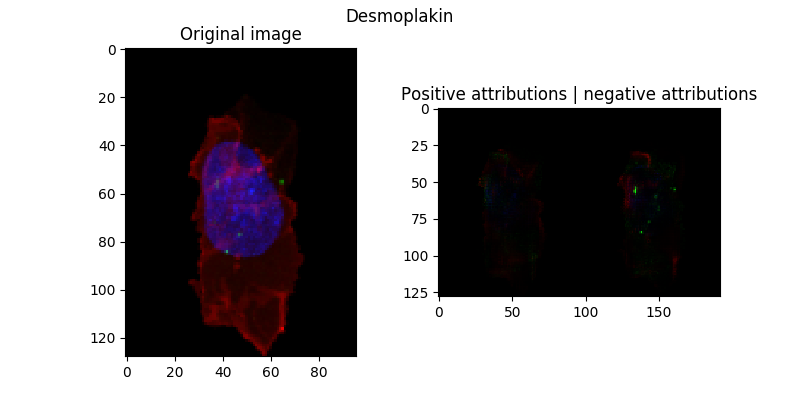

Delta from baseline: -0.16. Sum of attributions: -0.17


100%|██████████| 100/100 [00:30<00:00,  3.24it/s]


<IPython.core.display.Javascript object>


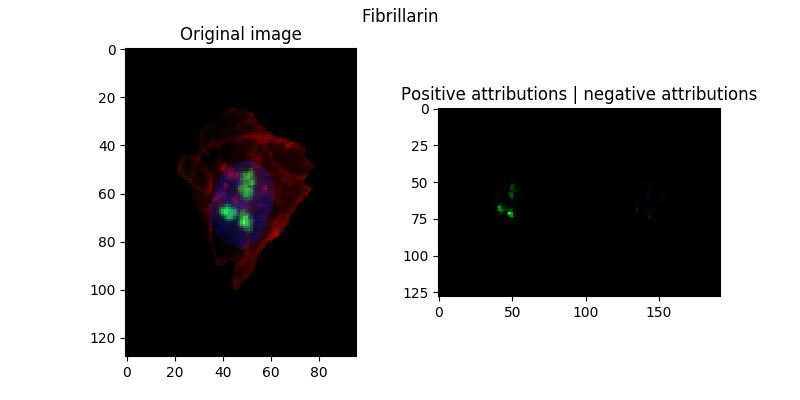

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: 1.00. Sum of attributions: 1.01


100%|██████████| 100/100 [00:30<00:00,  2.88it/s]


<IPython.core.display.Javascript object>


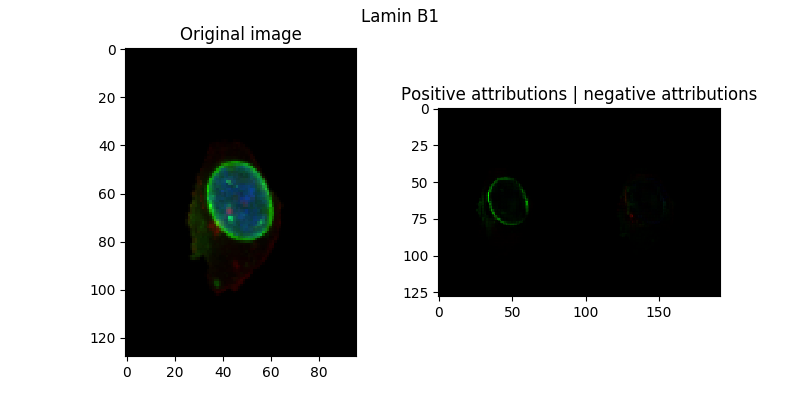

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: 1.00. Sum of attributions: 1.00


100%|██████████| 100/100 [00:30<00:00,  3.19it/s]


<IPython.core.display.Javascript object>


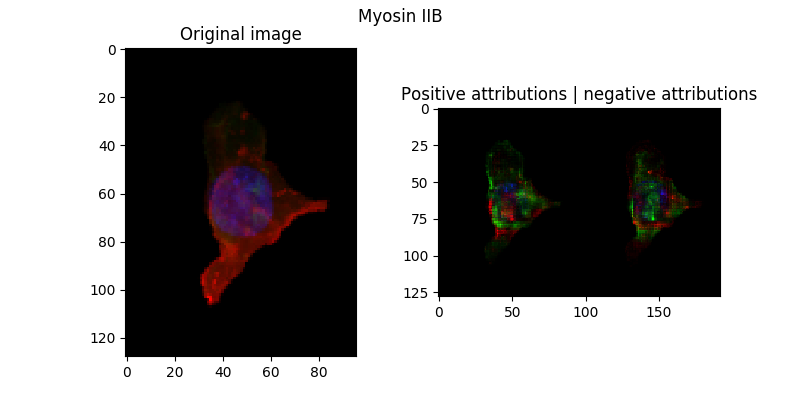

Delta from baseline: 0.40. Sum of attributions: 0.40


100%|██████████| 100/100 [00:30<00:00,  3.08it/s]


<IPython.core.display.Javascript object>


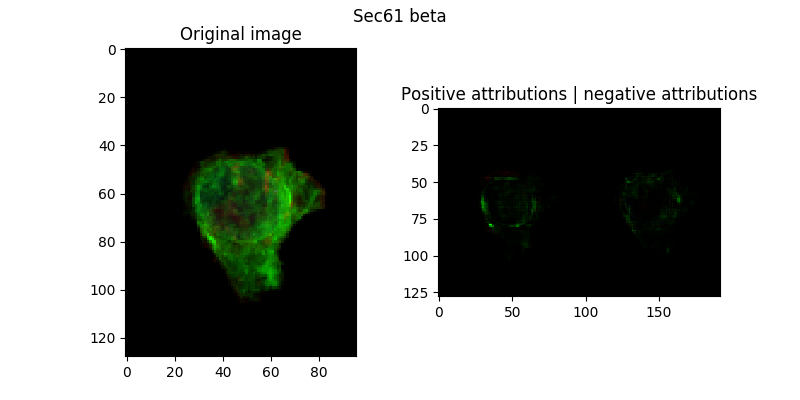

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: 1.00. Sum of attributions: 1.01


100%|██████████| 100/100 [00:29<00:00,  3.27it/s]


<IPython.core.display.Javascript object>


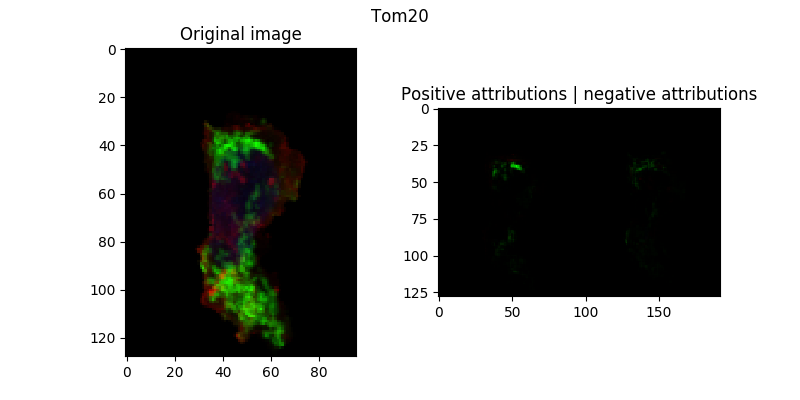

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: 1.00. Sum of attributions: 0.99


100%|██████████| 100/100 [00:30<00:00,  3.28it/s]


<IPython.core.display.Javascript object>


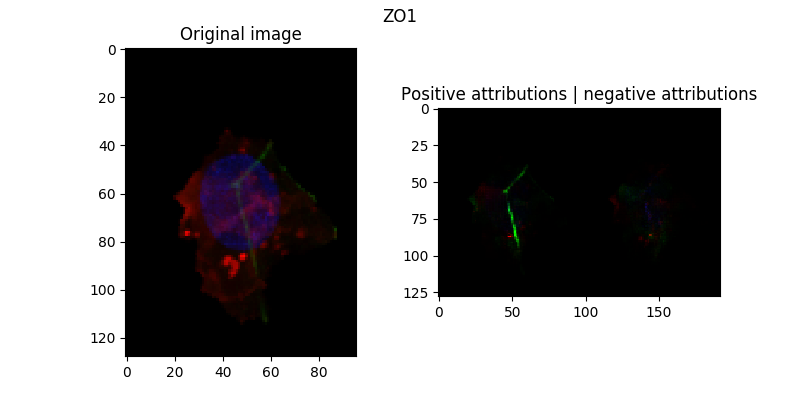

Delta from baseline: 1.00. Sum of attributions: 1.00


In [6]:
label_names = dp.label_names
labels = np.arange(len(label_names))
for label in labels:
    img = explain.get_label_examples(dp, label, 1)[0]
    igs, diff = explain.explain(model, img, label, n_steps=100, gpu_id=gpu_id, baseline=None, 
                                title = label_names[label])
    msg = "Delta from baseline: {0:0.2f}. Sum of attributions: {1:0.2f}"
    msg = msg.format(diff, igs.sum())
    print(msg)

### Explaining incorrect class labels
In addition to explaining why the model predicts the correct class, we can also look at the reasons it has for __not__ predicting the wrong class. Below, I look at the explanations for predicting each class label, in the case where the correct class is Fibrillarin. The plot labels titles indicate the structure whose predition is being explained.

The model gives mostly negative attributions to the very compact fibrillarin structure.

100%|██████████| 100/100 [00:30<00:00,  2.83it/s]


<IPython.core.display.Javascript object>


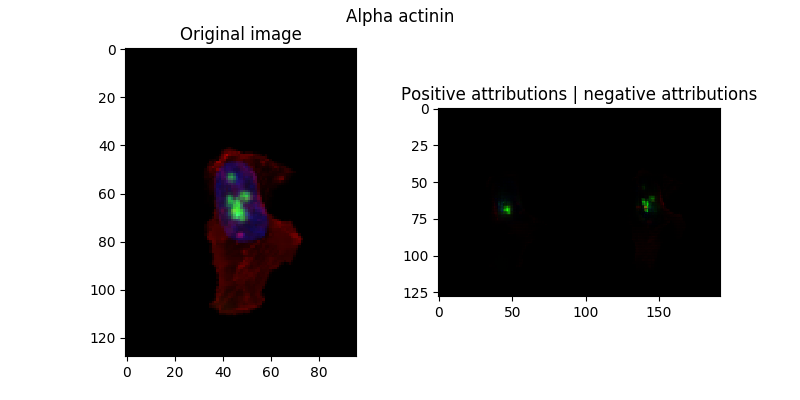

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: -0.00. Sum of attributions: -0.00


100%|██████████| 100/100 [00:29<00:00,  2.81it/s]


<IPython.core.display.Javascript object>


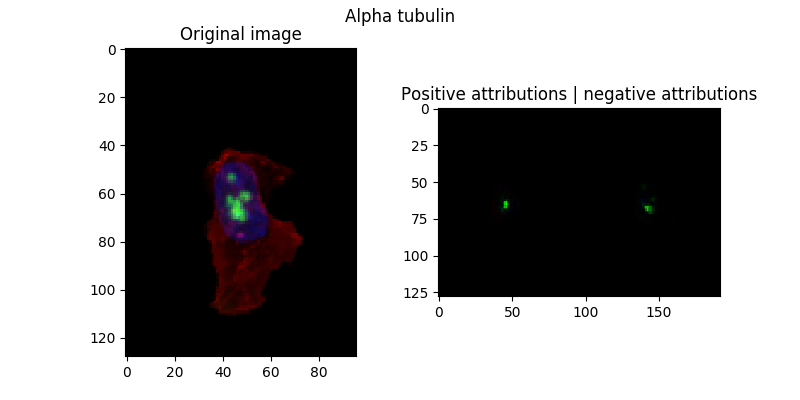

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: -0.00. Sum of attributions: -0.00


100%|██████████| 100/100 [00:29<00:00,  2.94it/s]


<IPython.core.display.Javascript object>


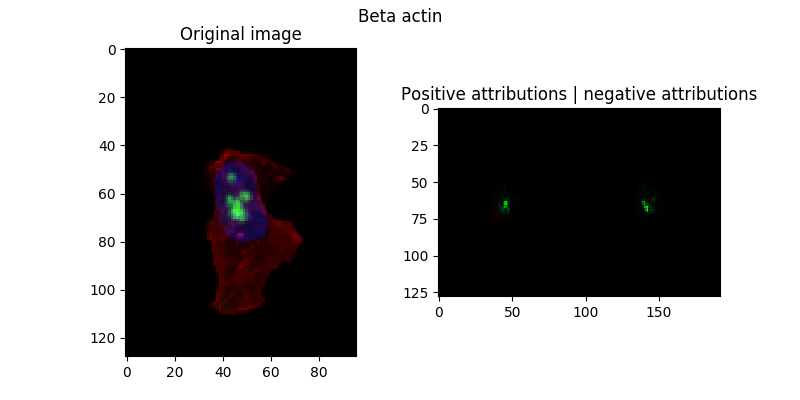

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: -0.00. Sum of attributions: -0.00


100%|██████████| 100/100 [00:29<00:00,  2.88it/s]


<IPython.core.display.Javascript object>


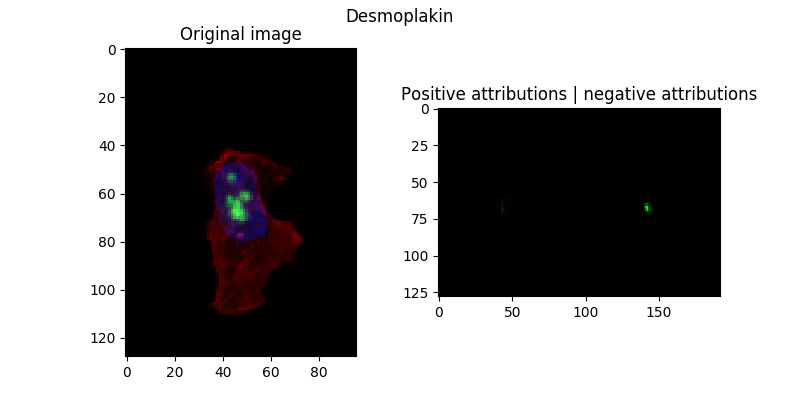

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: -1.00. Sum of attributions: -1.00


100%|██████████| 100/100 [00:29<00:00,  3.17it/s]


<IPython.core.display.Javascript object>


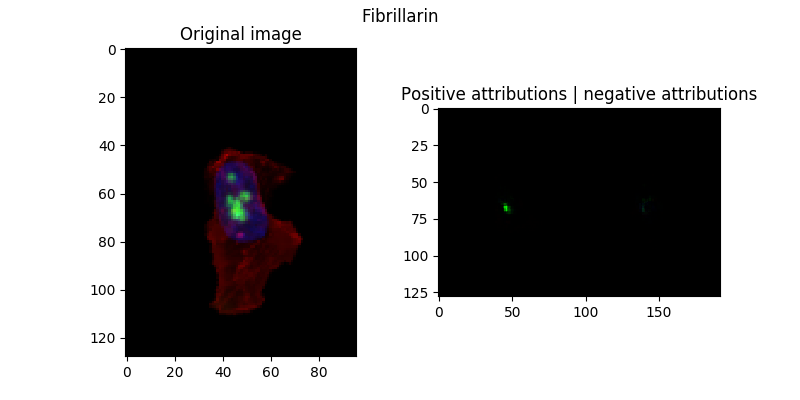

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: 1.00. Sum of attributions: 1.00


100%|██████████| 100/100 [00:30<00:00,  3.28it/s]


<IPython.core.display.Javascript object>


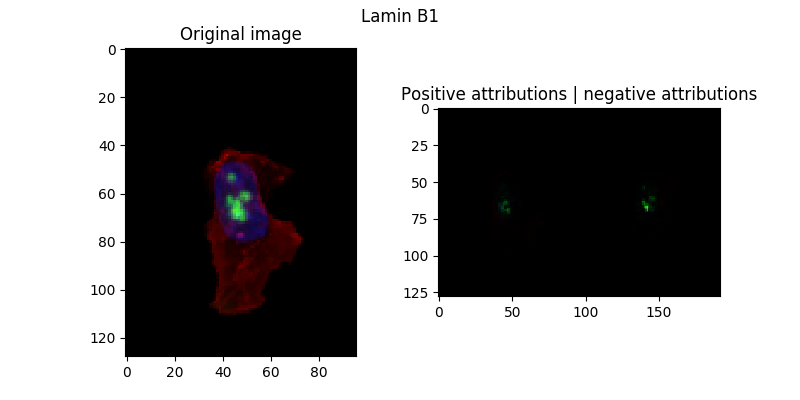

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: -0.00. Sum of attributions: -0.00


100%|██████████| 100/100 [00:29<00:00,  3.27it/s]


<IPython.core.display.Javascript object>


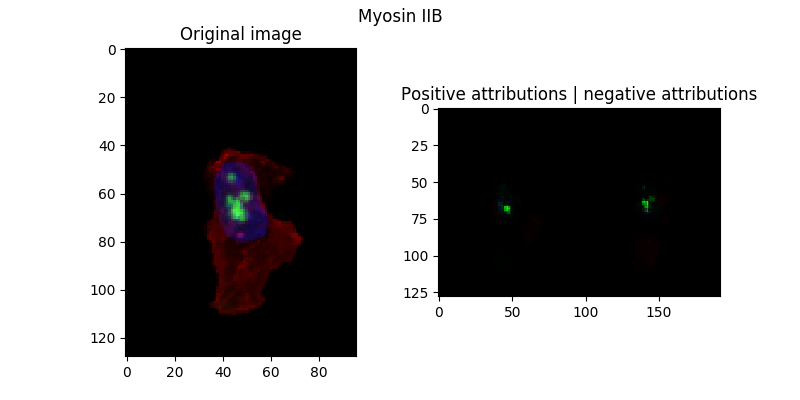

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: -0.00. Sum of attributions: -0.00


100%|██████████| 100/100 [00:29<00:00,  3.27it/s]


<IPython.core.display.Javascript object>


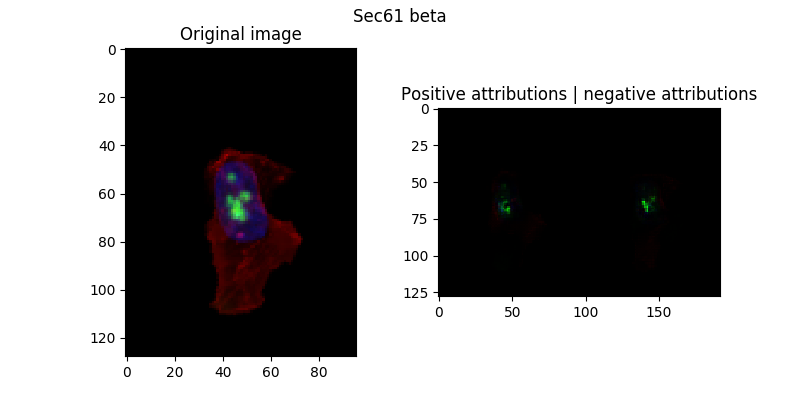

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: -0.00. Sum of attributions: -0.00


100%|██████████| 100/100 [00:30<00:00,  3.10it/s]


<IPython.core.display.Javascript object>


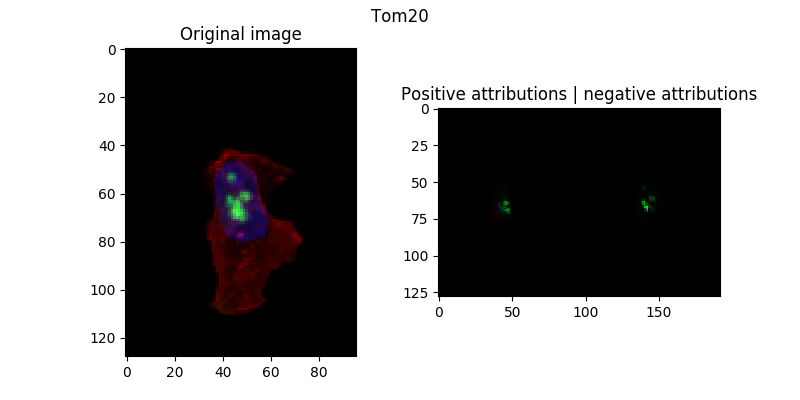

  0%|          | 0/100 [00:00<?, ?it/s]

Delta from baseline: -0.00. Sum of attributions: -0.00


100%|██████████| 100/100 [00:29<00:00,  3.15it/s]


<IPython.core.display.Javascript object>


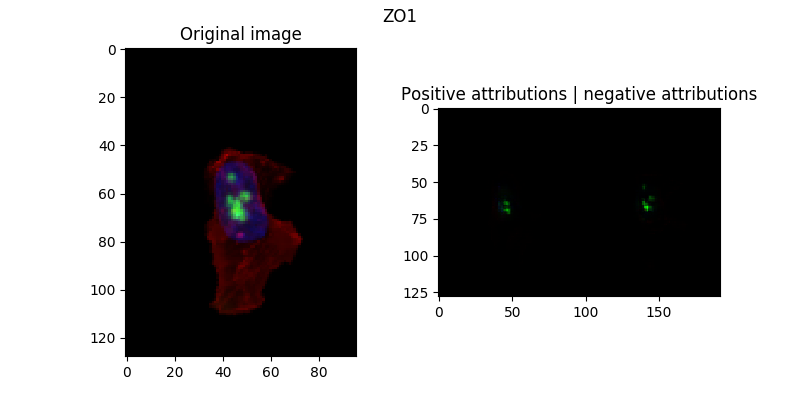

Delta from baseline: -0.00. Sum of attributions: -0.00


In [7]:
labels = np.arange(len(label_names))
label_correct = 4  # Ths is the label for Fibrillarin
img = explain.get_label_examples(dp, label_correct, 1)[0]  # Explain different predictions for same example.
for label in labels:
    igs, diff = explain.explain(model, img, label, n_steps=100, gpu_id=gpu_id, baseline=None, 
                                title = label_names[label])
    msg = "Delta from baseline: {0:0.2f}. Sum of attributions: {1:0.2f}"
    msg = msg.format(diff, igs.sum())
    print(msg)